In [14]:
import pylibxc
import numpy as np
import matplotlib.pyplot as plt

def get_density(r_s):
  return 3/(4*np.pi*(r_s ** 3))

def hartree_to_mRy(energy):
  return energy * 2 * 1000

def get_eps_x_unif(n):
  return -(3/(4*np.pi))*((n*3*np.pi**2)**(1/3))

def get_grad_n(s, n):
  return s*((n**(4/3))*2*(3*np.pi**2)**(1/3))


eps_x = eps_c = 'zk'


In [59]:
# test LDA

# build functional
lda = pylibxc.LibXCFunctional("lda_c_vwn", "unpolarized")


r_s = np.linspace(0.5, 10)
r_s = np.array([0.5, 1, 2, 3, 4, 5, 6, 10])

r_s = 1
gams = np.linspace(1, 10)


# create input
inp = {}
inp["rho"] = get_density(r_s/gams)

# results in a.u.
lda_res = lda.compute(inp)


# processing
lda_res[eps_c] = np.squeeze(lda_res[eps_c])

In [ ]:
# plots
fig, ax = plt.subplots()

ax.plot(gams, lda_res[eps_c], label=r'$\epsilon_{\mathrm{C}}^{\mathrm{VWN}}(r_s / \gamma)$')
ax.plot(gams, lda_res[eps_c][0] * gams, label=r'$ \gamma \, \epsilon_{\mathrm{C}}^{\mathrm{VWN}}(r_s)$')

ax.set_xlabel(r'$\gamma$')
ax.legend()

In [32]:
# unpolarized PBE

# build functional
pbe_x = pylibxc.LibXCFunctional("gga_x_pbe", "unpolarized")
pbe_c = pylibxc.LibXCFunctional("gga_c_pbe", "unpolarized")

r_s = np.array([0.5, 1, 2, 3, 4, 5, 6, 10, 20, 40, 60, 100])
#r_s = np.array([0.01, 2, 10, 1000])

s = np.linspace(0, 5)

m_r_s, m_s = np.meshgrid(r_s, s, indexing='ij')

m_n = get_density(m_r_s)
m_sigma = get_grad_n(m_s, m_n)
m_eps_x_unif = get_eps_x_unif(m_n)

# create input
inp = {}
# density
inp["rho"] = m_n.flatten()
# | \nabla n |^2
inp["sigma"] = m_sigma.flatten()**2 


In [33]:
# results in a.u.
pbe_x_res = pbe_x.compute(inp)
pbe_c_res = pbe_c.compute(inp)

(0.0, 3.0)

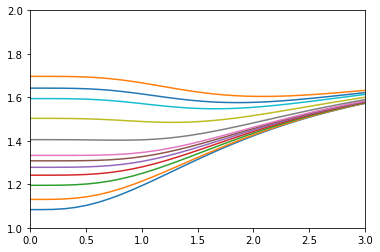

In [34]:
pbe_x_res[eps_x] = np.squeeze(pbe_x_res[eps_x])
pbe_c_res[eps_c] = np.squeeze(pbe_c_res[eps_c])

pbe_xc_res = pbe_x_res[eps_x] + pbe_c_res[eps_c]
pbe_xc_res = pbe_xc_res.reshape(m_r_s.shape)

# F_xc
pbe_xc_res /= m_eps_x_unif

# permute axes for plots
perm = [1, 0]

plt.plot(np.transpose(m_s, perm), np.transpose(pbe_xc_res, perm))

plt.ylim(1, 2)
#plt.ylim(1.4, 1.6)

plt.xlim(0, 3)

In [ ]:
# polarized PBE

# todo compare F_xc ( \zeta = 1)
# drop exchange..
# check for all \zeta  